In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p colabData3
!google-drive-ocamlfuse colabData3

In [3]:
%%bash
cd
ls
cd colabData3/dataset_drive

colabData3
datalab


In [49]:
# ucitaj imena slika u folderu u listu set

import os

koje = "psi"  # psi, svi, macke

#-------------------------------------------------------------------------------

set = []
labels = []  # ime pasmine <-> broj
count = 0

for i in range(37):
  set.append([])

  
if koje == "svi":
  
  for file in [doc for doc in os.listdir("colabData3/dataset_drive") if doc.endswith(".jpg")]:
    x = file.split('_')[0]
    if x not in labels:
      labels.append(x)
    set[labels.index(x)].append(file)    
      
      
if koje == "psi":
  
  for file in [doc for doc in os.listdir("colabData3/dataset_drive") if doc.endswith(".jpg")]:
    # ako zapocinje ime sa malim slovom je pas
    if "a" <= file[0] <= "z":
      x = file.split('_')[0]
      if x not in labels:
        labels.append(x)
      set[labels.index(x)].append(file)  


      
if koje == "macke":
 
  for file in [doc for doc in os.listdir("colabData3/dataset_drive") if doc.endswith(".jpg")]:
    # ako zapocinje ime sa velikim slovom je macka
    if "A" <= file[0] <= "Z":
      x = file.split('_')[0]  
      if x not in labels:
        labels.append(x)
      set[labels.index(x)].append(file)
      count = count + 1;
      #if count >= 300:
        #break

    
k = 0
while(k < len(labels)):
  if len(set[k]) < 100:
    print('izbacujem ' + labels[k] + ' jer ima premalo dataseta')
    set.pop(k)
    labels.pop(k)
    continue
  else:
    k = k+1
    
   
print("labels = " + str(len(labels)))
print(set)
print(labels)

labels = 23
[['yorkshire_terrier_104.jpg', 'yorkshire_terrier_116.jpg', 'yorkshire_terrier_110.jpg', 'yorkshire_terrier_102.jpg', 'yorkshire_terrier_106.jpg', 'yorkshire_terrier_109.jpg', 'yorkshire_terrier_112.jpg', 'yorkshire_terrier_120 (06d75105).jpg', 'yorkshire_terrier_119.jpg', 'yorkshire_terrier_103 (0c530898).jpg', 'yorkshire_terrier_107.jpg', 'yorkshire_terrier_108.jpg', 'yorkshire_terrier_111.jpg', 'yorkshire_terrier_114.jpg', 'yorkshire_terrier_118.jpg', 'yorkshire_terrier_113.jpg', 'yorkshire_terrier_121.jpg', 'yorkshire_terrier_125.jpg', 'yorkshire_terrier_128.jpg', 'yorkshire_terrier_117.jpg', 'yorkshire_terrier_115.jpg', 'yorkshire_terrier_129.jpg', 'yorkshire_terrier_122.jpg', 'yorkshire_terrier_127.jpg', 'yorkshire_terrier_126 (bc34fc0d).jpg', 'yorkshire_terrier_124.jpg', 'yorkshire_terrier_130.jpg', 'yorkshire_terrier_131.jpg', 'yorkshire_terrier_140.jpg', 'yorkshire_terrier_123.jpg', 'yorkshire_terrier_138 (af9ffc6f).jpg', 'yorkshire_terrier_135.jpg', 'yorkshire_ter

In [0]:
from keras.utils.np_utils import to_categorical
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.callbacks import ModelCheckpoint

from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import optimizers

In [51]:
# napravi split u train & test bez overfittinga

from sklearn.model_selection import train_test_split

train_list = []
test_list = []
validation_list = []
train = []
test = []
validation = []

for i in range(len(labels)):
  ttrain, ttest = train_test_split(set[i], test_size=0.3, random_state=762)
  ttrain, tvalidation = train_test_split(ttrain, test_size=0.3, random_state=35)
  
  train_list.append(ttrain)
  test_list.append(ttest)
  validation_list.append(tvalidation)
  
for li in train_list:
  for el in li:
    train.append(el)
    
for li in test_list:
  for el in li:
    test.append(el)
    
for li in validation_list:
  for el in li:
    validation.append(el)
  

print("Train set size = " + str(len(train)))
print("Test set size = " + str(len(test)))
print("Validation set size = " + str(len(validation)))

Train set size = 2459
Test set size = 1510
Validation set size = 1057


In [52]:
# labels

label_train = []
label_test = []
label_validation = []

for slika in train:
  x = slika.split('_')[0]
  label_train.append(labels.index(x))
  
for slika in test:
  x = slika.split('_')[0]
  label_test.append(labels.index(x))
  
for slika in validation:
  x = slika.split('_')[0]
  label_validation.append(labels.index(x))
  
label_train = to_categorical(label_train)
label_test = to_categorical(label_test)
label_validation = to_categorical(label_validation)

label_train = np.asarray(label_train)
label_test = np.asarray(label_test)
label_validation = np.asarray(label_validation)

print(label_train.shape)
print(label_test.shape)
print(label_validation.shape)

(2459, 23)
(1510, 23)
(1057, 23)


In [53]:
# preporocessing

img_width, img_height = 200, 200
processed_train = []
processed_test = []
processed_validation = []

for slika in train:
  path = 'colabData3/dataset_drive/' + str(slika)
  try:
    img = image.load_img(path, target_size=(img_width, img_height))
    numpy_image = image.img_to_array(img)
    processed_train.append(numpy_image)
  except OSError:
    print("could not open " + path)
  
for slika in test:
  path = 'colabData3/dataset_drive/' + str(slika)
  try:
    img = image.load_img(path, target_size=(img_width, img_height))
    numpy_image = image.img_to_array(img)
    processed_test.append(numpy_image)
  except OSError:
    print("could not open " + path)
    
for slika in validation:
  path = 'colabData3/dataset_drive/' + str(slika)
  try:
    img = image.load_img(path, target_size=(img_width, img_height))
    numpy_image = image.img_to_array(img)
    processed_validation.append(numpy_image)
  except OSError:
    print("could not open " + path)
  
processed_train = np.asarray(processed_train)
processed_test = np.asarray(processed_test)
processed_validation = np.asarray(processed_validation)

print(processed_train.shape)
print(processed_test.shape)
print(processed_validation.shape)

(2459, 200, 200, 3)
(1510, 200, 200, 3)
(1057, 200, 200, 3)


In [0]:
# mreza, baza
model = ResNet50(weights='imagenet', include_top=False)  #include_top: whether to include the fully-connected layer at the top of the network.

In [0]:
# custom layeri

x = model.output
#x = Dense(512, activation="sigmoid")(x)
#x = Dropout(0.3)(x)
x = Dense(1024, activation="relu")(x)
x = GlobalAveragePooling2D(input_shape = processed_train.shape[1:])(x)
#x = Dense(512, activation="relu")(x)
x = Dropout(0.4)(x)
predictions = Dense(len(labels), activation="softmax")(x)

In [69]:
# zamrznemo što ne zelimo trenirati

print(len(model.layers))  #313 = layeri u inceptionv3
'''k = 313

for layer in model.layers[:k]:
    layer.trainable = False

for layer in model.layers[k:]:
    layer.trainable = True'''

model_final = Model(input = model.input, output = predictions)

175


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# choose the layers which are updated by training

k = 174 # <313, prije 279
layer_num = len(model.layers)
for layer in model_final.layers[:k]:
    layer.trainable = False
    
for layer in model_final.layers[k:]:
    layer.trainable = True

In [71]:
# treniranje
#izmjena: sparse_categorical_crossentropy umjesto categorical_crossentropy
model_final.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

# best validation loss
checkpointer = ModelCheckpoint(filepath='colabData3/weights.hdf5', verbose=1, save_best_only=True)

history = model_final.fit(processed_train, label_train, batch_size=30, epochs=30, shuffle=True,  validation_data=(processed_validation, label_validation), callbacks=[checkpointer])

Train on 2459 samples, validate on 1057 samples
Epoch 1/30
2459/2459 [==============================] - 37s 15ms/step - loss: 2.4826 - acc: 0.4591 - val_loss: 1.4109 - val_acc: 0.6121

Epoch 00001: val_loss improved from inf to 1.41088, saving model to colabData3/weights.hdf5
Epoch 2/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.9383 - acc: 0.7161 - val_loss: 1.2498 - val_acc: 0.6850

Epoch 00002: val_loss improved from 1.41088 to 1.24983, saving model to colabData3/weights.hdf5
Epoch 3/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.6885 - acc: 0.7853 - val_loss: 1.3065 - val_acc: 0.6812

Epoch 00003: val_loss did not improve from 1.24983
Epoch 4/30
 210/2459 [=>............................] - ETA: 16s - loss: 0.3497 - acc: 0.9048

2459/2459 [==============================] - 29s 12ms/step - loss: 0.5521 - acc: 0.8312 - val_loss: 1.2924 - val_acc: 0.6982

Epoch 00004: val_loss did not improve from 1.24983
Epoch 5/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.4150 - acc: 0.8666 - val_loss: 1.3135 - val_acc: 0.7010

Epoch 00005: val_loss did not improve from 1.24983
Epoch 6/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.3821 - acc: 0.8752 - val_loss: 1.4627 - val_acc: 0.7114

Epoch 00006: val_loss did not improve from 1.24983
Epoch 7/30
1530/2459 [=================>............] - ETA: 6s - loss: 0.3180 - acc: 0.8993

2459/2459 [==============================] - 29s 12ms/step - loss: 0.3238 - acc: 0.8951 - val_loss: 1.2856 - val_acc: 0.7550

Epoch 00007: val_loss did not improve from 1.24983
Epoch 8/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.3113 - acc: 0.9032 - val_loss: 1.5667 - val_acc: 0.7086

Epoch 00008: val_loss did not improve from 1.24983
Epoch 9/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.2405 - acc: 0.9130 - val_loss: 1.5978 - val_acc: 0.7162

Epoch 00009: val_loss did not improve from 1.24983
Epoch 10/30
1680/2459 [===================>..........] - ETA: 5s - loss: 0.2558 - acc: 0.9173

2459/2459 [==============================] - 29s 12ms/step - loss: 0.2627 - acc: 0.9130 - val_loss: 1.5555 - val_acc: 0.7219

Epoch 00010: val_loss did not improve from 1.24983
Epoch 11/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.2143 - acc: 0.9276 - val_loss: 1.7791 - val_acc: 0.7219

Epoch 00011: val_loss did not improve from 1.24983
Epoch 12/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.2302 - acc: 0.9272 - val_loss: 1.8094 - val_acc: 0.7313

Epoch 00012: val_loss did not improve from 1.24983
Epoch 13/30
1680/2459 [===================>..........] - ETA: 5s - loss: 0.1742 - acc: 0.9452

2459/2459 [==============================] - 29s 12ms/step - loss: 0.1821 - acc: 0.9370 - val_loss: 1.9769 - val_acc: 0.7105

Epoch 00013: val_loss did not improve from 1.24983
Epoch 14/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1861 - acc: 0.9382 - val_loss: 1.8476 - val_acc: 0.7209

Epoch 00014: val_loss did not improve from 1.24983
Epoch 15/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1366 - acc: 0.9561 - val_loss: 1.4895 - val_acc: 0.7644

Epoch 00015: val_loss did not improve from 1.24983
Epoch 16/30
1680/2459 [===================>..........] - ETA: 5s - loss: 0.1945 - acc: 0.9399

2459/2459 [==============================] - 29s 12ms/step - loss: 0.1848 - acc: 0.9410 - val_loss: 1.7320 - val_acc: 0.7550

Epoch 00016: val_loss did not improve from 1.24983
Epoch 17/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1716 - acc: 0.9484 - val_loss: 1.7488 - val_acc: 0.7540

Epoch 00017: val_loss did not improve from 1.24983
Epoch 18/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1427 - acc: 0.9540 - val_loss: 1.9408 - val_acc: 0.7455

Epoch 00018: val_loss did not improve from 1.24983
Epoch 19/30
1680/2459 [===================>..........] - ETA: 5s - loss: 0.1361 - acc: 0.9565

2459/2459 [==============================] - 29s 12ms/step - loss: 0.1405 - acc: 0.9565 - val_loss: 2.5211 - val_acc: 0.6935

Epoch 00019: val_loss did not improve from 1.24983
Epoch 20/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1294 - acc: 0.9601 - val_loss: 1.9103 - val_acc: 0.7483

Epoch 00020: val_loss did not improve from 1.24983
Epoch 21/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1259 - acc: 0.9622 - val_loss: 2.2657 - val_acc: 0.7143

Epoch 00021: val_loss did not improve from 1.24983
Epoch 22/30
1680/2459 [===================>..........] - ETA: 5s - loss: 0.0965 - acc: 0.9690

2459/2459 [==============================] - 29s 12ms/step - loss: 0.1222 - acc: 0.9646 - val_loss: 1.8340 - val_acc: 0.7625

Epoch 00022: val_loss did not improve from 1.24983
Epoch 23/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1257 - acc: 0.9638 - val_loss: 2.1718 - val_acc: 0.7275

Epoch 00023: val_loss did not improve from 1.24983
Epoch 24/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1117 - acc: 0.9667 - val_loss: 2.2077 - val_acc: 0.7171

Epoch 00024: val_loss did not improve from 1.24983
Epoch 25/30
1680/2459 [===================>..........] - ETA: 5s - loss: 0.1144 - acc: 0.9679

2459/2459 [==============================] - 29s 12ms/step - loss: 0.1130 - acc: 0.9683 - val_loss: 2.1747 - val_acc: 0.7360

Epoch 00025: val_loss did not improve from 1.24983
Epoch 26/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1639 - acc: 0.9540 - val_loss: 2.7225 - val_acc: 0.6991

Epoch 00026: val_loss did not improve from 1.24983
Epoch 27/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1005 - acc: 0.9719 - val_loss: 2.0511 - val_acc: 0.7474

Epoch 00027: val_loss did not improve from 1.24983
Epoch 28/30
1680/2459 [===================>..........] - ETA: 5s - loss: 0.1164 - acc: 0.9685

2459/2459 [==============================] - 29s 12ms/step - loss: 0.1008 - acc: 0.9703 - val_loss: 1.9559 - val_acc: 0.7692

Epoch 00028: val_loss did not improve from 1.24983
Epoch 29/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1178 - acc: 0.9691 - val_loss: 2.8726 - val_acc: 0.6793

Epoch 00029: val_loss did not improve from 1.24983
Epoch 30/30
2459/2459 [==============================] - 29s 12ms/step - loss: 0.1166 - acc: 0.9679 - val_loss: 2.1969 - val_acc: 0.7332

Epoch 00030: val_loss did not improve from 1.24983


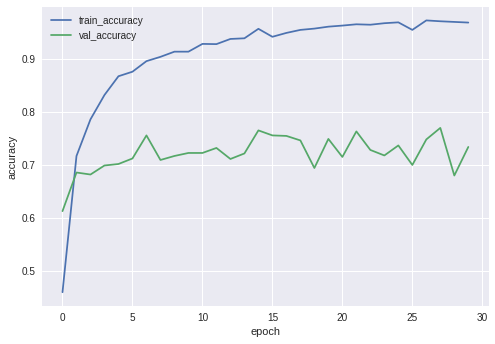

In [72]:
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'val_accuracy'], loc='best')
    plt.show()

print(history)
show_history(history)

tocno/(tocno + netocno) = 0.7629139072847683
score najgore slike je : 3.022216e-07 , inace je klase : leonberger_19.jpg, a svrstao je u english.


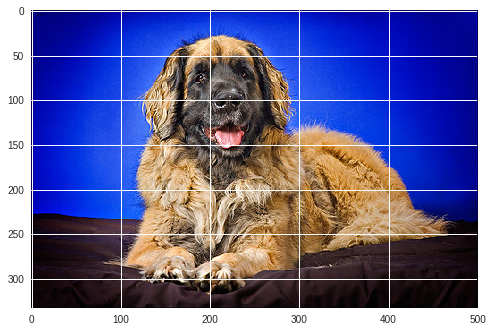

In [60]:
import matplotlib.image as mpimg

model_final.load_weights('colabData3/weights.hdf5')
score = model_final.predict(processed_test)

tocno = []
netocno = []
krive_klase_count = []
tocne_klase_count = []

for i in labels:
  krive_klase_count.append(0)
  tocne_klase_count.append(0)

score_najgore = 1.0

for i in range(len(score)):
  if np.argmax(np.asarray(score[i])) == np.argmax(np.asarray(label_test[i])):
    tocno.append(test[i])
    tocne_klase_count[np.argmax(np.asarray(label_test[i]))] += 1
  else:
    krive_klase_count[np.argmax(np.asarray(label_test[i]))] += 1
    netocno.append(test[i])
    score_za_svoju_klasu = score[i][np.argmax(np.asarray(label_test[i]))]
    if score_za_svoju_klasu < score_najgore:
      score_najgore = score_za_svoju_klasu
      ime_najgore = test[i]
      klasa_najgore = np.argmax(np.asarray(score[i]))
    
acc = len(tocno)/(len(tocno) + len(netocno))
    
print("tocno/(tocno + netocno) = " + str(acc))
print("score najgore slike je : " + str(score_najgore) + " , inace je klase : " + str(ime_najgore) + ", a svrstao je u " + str(labels[klasa_najgore]) + ".")

img = mpimg.imread('colabData3/dataset_drive/' + ime_najgore)
plt.imshow(img)

plt.show()

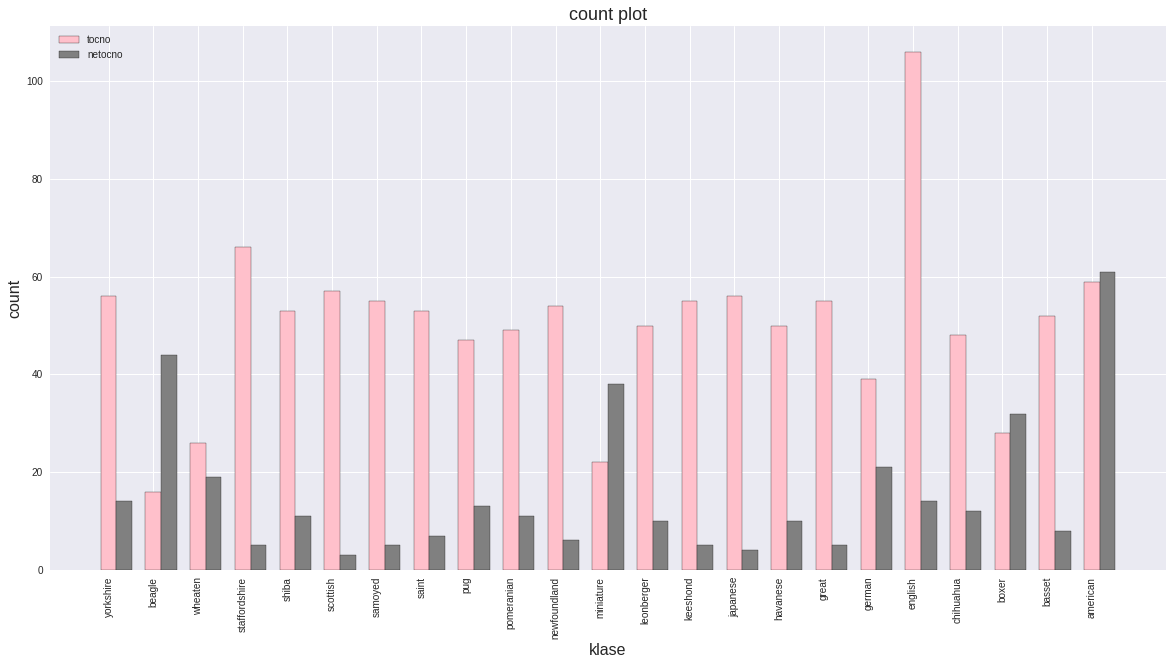

In [73]:
kazalo=['tocno','netocno']
pos = np.arange(len(labels))
bar_width = 0.35
 
plt.figure(figsize=(20, 10))
  
plt.bar(pos, tocne_klase_count, bar_width, color='pink', edgecolor='black')
plt.bar(pos  +bar_width, krive_klase_count, bar_width, color='gray', edgecolor='black')
plt.xticks(pos, labels, rotation='vertical')
plt.xlabel('klase', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.title('count plot',fontsize=18)
plt.legend(kazalo, loc=2)
plt.show()